<a href="https://colab.research.google.com/github/Jafrin-2007/OASIS-infobyte-/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [5]:
from google.colab import files
uploaded=files.upload()

Saving car_prediction_data.csv to car_prediction_data.csv


In [9]:
df=pd.read_csv("car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
print(df.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [13]:
inputs = df.drop(['Car_Name', 'Owner', 'Seller_Type'], axis='columns')
target=df.Selling_Price
inputs

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual
297,2015,4.00,5.90,60000,Petrol,Manual
298,2009,3.35,11.00,87934,Petrol,Manual
299,2017,11.50,12.50,9000,Diesel,Manual


In [14]:
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()


In [16]:
print(df.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [17]:
inputs['Fuel_Type_n']=Numerics.fit_transform(inputs['Fuel_Type'])
inputs['Transmission_n']=Numerics.fit_transform(inputs['Transmission'])
inputs

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Fuel_Type_n,Transmission_n
0,2014,3.35,5.59,27000,Petrol,Manual,2,1
1,2013,4.75,9.54,43000,Diesel,Manual,1,1
2,2017,7.25,9.85,6900,Petrol,Manual,2,1
3,2011,2.85,4.15,5200,Petrol,Manual,2,1
4,2014,4.60,6.87,42450,Diesel,Manual,1,1
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual,1,1
297,2015,4.00,5.90,60000,Petrol,Manual,2,1
298,2009,3.35,11.00,87934,Petrol,Manual,2,1
299,2017,11.50,12.50,9000,Diesel,Manual,1,1


In [18]:
inputs_n=inputs.drop(['Fuel_Type','Transmission','Selling_Price'],axis='columns')
inputs_n

,Year,Present_Price,Kms_Driven,Fuel_Type_n,Transmission_n
0,2014,5.59,27000,2,1
1,2013,9.54,43000,1,1
2,2017,9.85,6900,2,1
3,2011,4.15,5200,2,1
4,2014,6.87,42450,1,1
...,...,...,...,...,...
296,2016,11.60,33988,1,1
297,2015,5.90,60000,2,1
298,2009,11.00,87934,2,1
299,2017,12.50,9000,1,1


In [19]:
model=linear_model.LinearRegression()

In [20]:
model.fit(inputs_n,target)

LinearRegression()

In [22]:
model.n_features_in_


5

In [23]:
pred = model.predict([[2013, 430000, 1, 1, 0]])
print(pred)


[204660.58298613]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
import matplotlib.pyplot as plt

In [26]:
training_data_prediction=model.predict(inputs_n)

In [27]:
from sklearn import metrics

In [28]:
error_score=metrics.r2_score(target,training_data_prediction)
print("R squared Errorv: ",error_score)


R squared Errorv:  0.8691742287475993


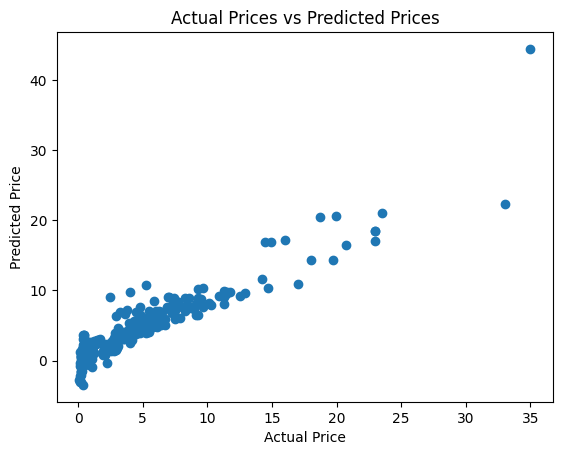

In [29]:
plt.scatter(target,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()